In [1]:
import gzip, json
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset

pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 150)

data_file = "../_data/wiki/20220301.en.1gb.json.gz"

In [2]:
file = (gzip.open(data_file, 'r') if data_file.endswith(".gz")
        else open(data_file, 'r'))

wiki = json.loads(file.read())
hf_config = wiki["config"]["hf_config"]
article_titles = wiki["article_title"]
article_to_dataset_id = wiki["article_to_dataset_id"]

file.close()

wiki_ds = load_dataset("wikipedia", hf_config, split="train")

wiki = pd.DataFrame(wiki["train"])
wiki["dataset_id"] = wiki["article_id"].apply(lambda id: article_to_dataset_id.get(str(id)))
wiki["space_count"] = wiki["sentence"].apply(lambda s: s.count(" "))

display(wiki)

Reusing dataset wikipedia (/Users/yenson/.cache/huggingface/datasets/wikipedia/20220301.en/2.0.0/aa542ed919df55cc5d3347f42dd4521d05ca68751f50dbc32bae2a7f1e167559)


,article_id,sentence,dataset_id,space_count
0,14877816,Myeloid cell Nuclear Differentiation Antigen is a protein that in humans is encoded as MNDA gene.,1953327,15
1,14877816,The myeloid cell nuclear differentiation antigen (MNDA) is detected only in nuclei of cells of the granulocyte-monocyte lineage.,1953327,17
2,14877816,"A 200-amino acid region of human MNDA is strikingly similar to a region in the proteins encoded by a family of interferon-inducible mouse genes, d...",1953327,38
3,14877816,"The 1.8-kb MNDA mRNA, which contains an interferon-stimulated response element in the 5' UTR, was significantly upregulated in human monocytes exp...",1953327,23
4,14877816,"MNDA is located within 2,200 kb of FCER1A, APCS, CRP, and SPTA1.",1953327,11
...,...,...,...,...
9403581,11157206,"After successfully bouncing back from his third professional loss, Kameda was scheduled to face Yonfrez Parejo in a WBA super bantamweight title e...",1587803,22
9403582,11157206,"He earned the status of mandatory challenger by beating Parejo by unanimous decision, with scores of 118110, 117111 and 116112.",1587803,19
9403583,11157206,List of Japanese boxing world champions,1587803,5
9403584,11157206,Profile of Tomoki Kameda from Premier Boxing Champions website,1587803,8


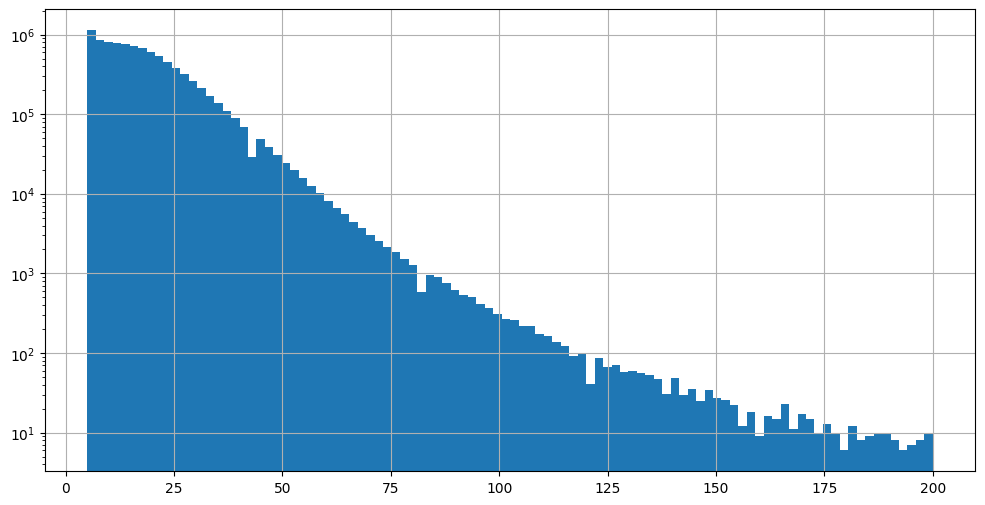

In [3]:
wiki["space_count"].hist(bins=100, figsize=(12, 6))
plt.yscale("log")

In [4]:
display(wiki.sort_values("space_count", ascending=False).head(10))

,article_id,sentence,dataset_id,space_count
7673487,12162195,"Nikpey made many improvements during his reign as mayor, some of his actions include: Construction of highways and parks, Comprehensive plan of Te...",1680334,200
1612319,12150109,"Maxine's Christmas Carol (2000) In this modernized (Y2K), animated adaptation of Charles Dickens' novel, A Christmas Carol, Hallmark Card comic ch...",1679111,200
3516774,34794907,"The Jubilee Medal ""60 Years of Victory in the Great Patriotic War 19411945"" is awarded to veterans of the Armed Forces of the USSR who participate...",3712589,200
2368993,68184985,An Act to provide for the establishment and functions of a National Rivers Authority and of committees to advise that Authority; to provide for th...,6315504,200
3641098,38047920,"In LA, for six spoken voices or spoken voice & soundtrack (poem, music: Rozalie Hirs; 2003)A throwaway coincidence that determined everything, for...",3996417,200
8053941,58387351,Whereas there has been a horrid and detestable Conspiracy formed & carried on by Papists and other wicked and traiterous Persons for assassinating...,5614029,199
3240378,278421,"the United States has, among other things, attempted or been perceived as attempting more or less unilaterally to do the following: pressure other...",132917,199
8893325,34574024,"The courts affected were Courts Baron, Courts Leet, Customary Courts of the manor, Courts of Pie Poudre, Courts of the Staple, Courts of the clerk...",3696456,199
7274920,21148264,"Both nations have signed several agreements such as a Cultural Agreement (1968); Agreement for Free Transit for Tourists, their Personal Effects a...",2513848,199
5727778,65848780,"Erik Andersson (M), 185 votes; Magdalena Andersson (S), 4,529 votes; Maria Arnholm (FP), 725 votes; Anti Avsan (M), 136 votes; Hanif Bali (M), 395...",6147675,199


In [5]:
# display(wiki[wiki["space_count"]>10].sort_values("space_count").head(10))
display(wiki.sort_values("space_count").head(10))

,article_id,sentence,dataset_id,space_count
2268961,49067613,Highest individual score progression of record,4905594,5
2460093,62805431,"""Criando Anticorpos/O Mundo Explodiu L Fora""",5933099,5
2460081,16740503,"Allen Rogers (footballer) (19302017), Australian footballer",2116876,5
2460080,16740503,"Allan Rogers (born 1932), British politician",2116876,5
6763131,52806824,"Physics envy, a symptom of mathematicism",5181865,5
2460062,26217870,Taxa named by Henry Weed Fowler,3000263,5
2460061,26217870,"Thoracocharax stellatus (Kner, 1858) (Spotfin hatchetfish)",3000263,5
2460025,3366127,"Edward Colston House, 1598 Tice Road",768923,5
603093,26205834,The single then climbed to No.,2999194,5
2460003,18956846,Medalists at the 2004 Summer Olympics,2318968,5


In [6]:
idx = 877123
# wiki.iloc[idx].sentence
wiki_ds[int(wiki["dataset_id"][idx])]

{'id': '37008251',
 'url': 'https://en.wikipedia.org/wiki/Rockin%27%20with%20You',
 'title': "Rockin' with You",
 'text': '"Rockin\' With You" is a song by Epic Records recording artist Chris Rene. It appears on his debut EP, I\'m Right Here, and was released as the third official single from the EP. It was written by the Rene siblings: Chris, Gabriel and Gina, an co-written/produced by Claude Kelly and Chuck Harmony. Rene released a preview of the song on his Facebook page.\n\nBackground\nThe single was written by Chris Rene, his brother and sister Gabriel and Gina, X Factor vocal coach Claude Kelly and producer Charles "Chuck Harmony" Harmon, and recorded in early 2012. At the 2012 MTV Video Music Awards, Chris teased that the song would become his third single from the album.  On September 13, 2012, Rene previewed a first listen of the single to his fans through his Facebook account. Rene says of the single: "this song is about basically a guy kind of being mischievous and not being